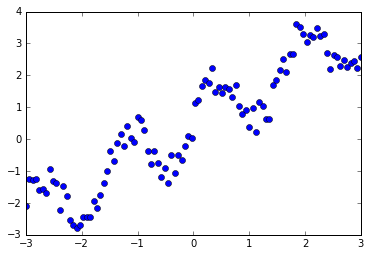

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 100)

rng = np.random.RandomState(42)
y = np.sin(4*x) + x + rng.uniform(size=len(x))

plt.plot(x, y, 'o')

before :  (100,)
after :  (100, 1)
Weight coefficients:  [ 0.92661741]
y-axis intercept:  0.470180743378
accuracy on training set:  0.826593279361
accuracy on test set:  0.724730560452


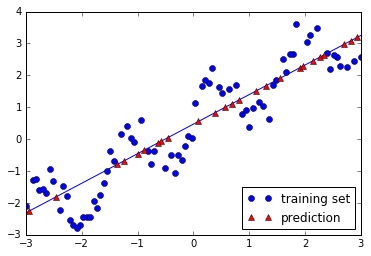

In [3]:
#Linear regression
print('before : ', x.shape)
X = x[:, np.newaxis]
print('after : ', X.shape)

#IMPORTANT : Split the data into training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1234)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o', color='blue', label = 'training set')
#plt.plot(X_test, y_test, '^', color='green')

y_pred = regressor.predict(X_test)

plt.plot(X_test, y_pred, '^', color='red', label = 'prediction')
plt.legend(loc='lower right')

print('accuracy on training set: ', regressor.score(X_train, y_train))
print('accuracy on test set: ', regressor.score(X_test, y_test))



accuracy on training set:  1.0
accuracy on test set:  0.929045201691


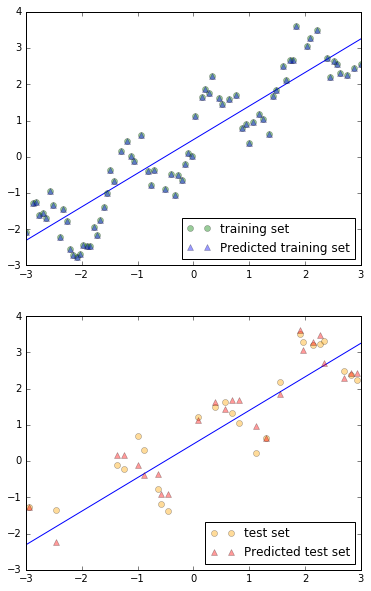

In [4]:
#KNeighbors regression

from sklearn.neighbors import KNeighborsRegressor

kr = KNeighborsRegressor(n_neighbors=1)
kr.fit(X_train, y_train)

plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o', color='green', alpha=0.4, label = 'training set')
y_pred = kr.predict(X_train)
plt.plot(X_train, y_pred, '^', color='blue', alpha=0.4, label = 'Predicted training set')
plt.legend(loc='lower right')

plt.subplot(2,1,2)
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_test, y_test, 'o', color='orange', alpha=0.4, label = 'test set')
y_pred = kr.predict(X_test)
plt.plot(X_test, y_pred, '^', color='red', alpha=0.4, label = 'Predicted test set')
plt.legend(loc='lower right')




print('accuracy on training set: ', kr.score(X_train, y_train))
print('accuracy on test set: ', kr.score(X_test, y_test))

datasize :  (506, 13)
target:  (506,)


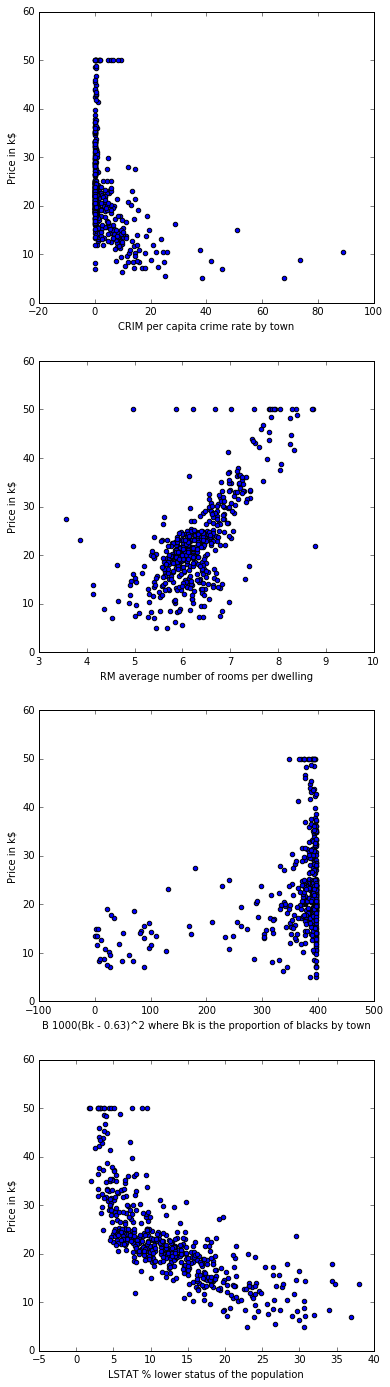

In [27]:
# Exercise on BOSTON dataset (House price)
from sklearn.datasets import load_boston

boston = load_boston()

#print('description: ', boston.DESCR)

print('datasize : ', boston.data.shape)
X = boston.data
print('target: ', boston.target.shape)
y = boston.target

plt.figure(figsize=(6,24))

#0, 5, 11, 12 seems to be the most discriminant features.
plt.subplot(4,1,1)
plt.scatter(X[:,0], y)
plt.xlabel(boston.feature_names[0] + ' per capita crime rate by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,2)
plt.scatter(X[:,5], y)
plt.xlabel(boston.feature_names[5] + ' average number of rooms per dwelling')
plt.ylabel('Price in k$')

plt.subplot(4,1,3)
plt.scatter(X[:,11], y)
plt.xlabel(boston.feature_names[11] + ' 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,4)
plt.scatter(X[:,12], y)
plt.xlabel(boston.feature_names[12] + ' % lower status of the population')
plt.ylabel('Price in k$')

Weight coefficients:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
y-axis intercept:  36.4911032804
Overall score for Linear Regression :  0.779660388528


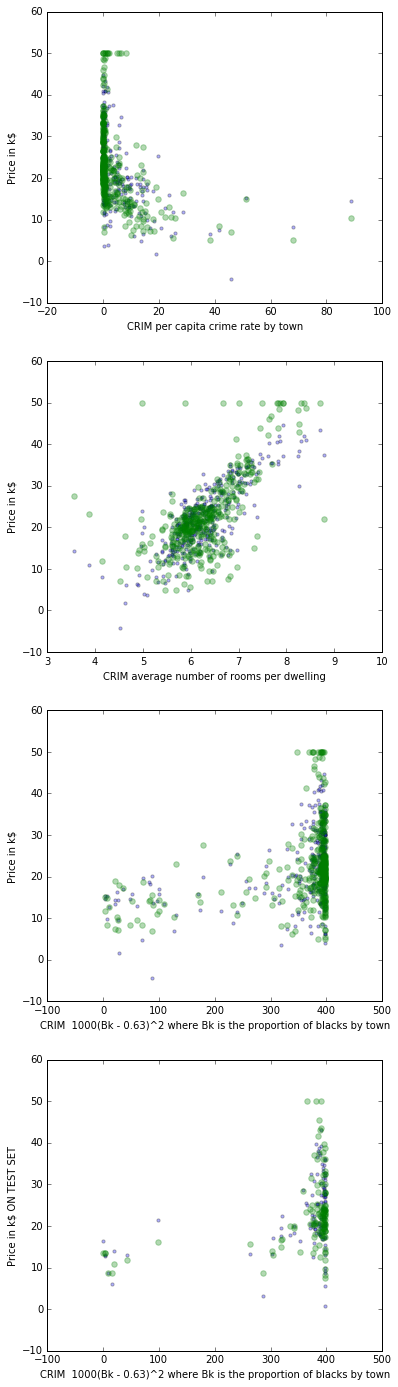

In [59]:
#
#print('**** others... *****')
#
#plt.figure(figsize=(6,72))
#for i in range(13):
#    plt.subplot(13, 1, i+1)
#    plt.scatter(X[:,i], y)
#    plt.xlabel(boston.feature_names[i])
#    plt.ylabel('Price in k$')
#

# First let's split the sample set into training and testing set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

# Then try a linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

print('Weight coefficients: ', lr.coef_)
print('y-axis intercept: ', lr.intercept_)

# Try to plot price according to some features
plt.figure(figsize=(6,24))

y_predict = lr.predict(X_train)


plt.subplot(4,1,1)
plt.scatter(X_train[:,0], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,0], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + ' per capita crime rate by town')
plt.ylabel('Price in k$')


plt.subplot(4,1,2)
plt.scatter(X_train[:,5], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,5], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + ' average number of rooms per dwelling')
plt.ylabel('Price in k$')

plt.subplot(4,1,3)
plt.scatter(X_train[:,11], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,11], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + '  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,4)
y_predict_test = lr.predict(X_test)
plt.scatter(X_test[:,11], y_predict_test, s=10, alpha=0.3)
plt.scatter(X_test[:,11], y_test, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + '  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$ ON TEST SET')


# Score ?
print('Overall score for Linear Regression : ',lr.score(X_test, y_test))



Overall score for Kneighbors on training set:  0.714195185562
Overall score for Kneighbors :  0.468735082141


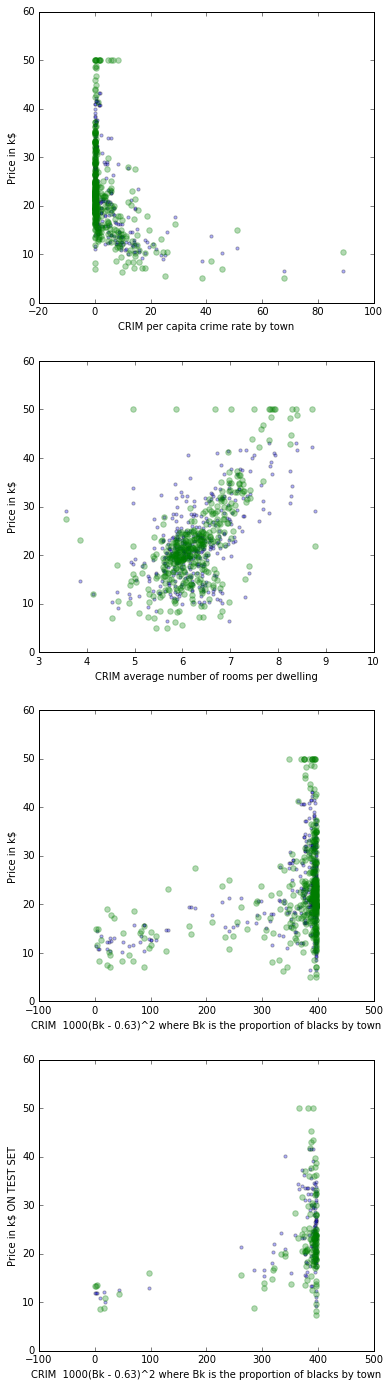

In [58]:
# Finally test with kneighbour algo
from sklearn.neighbors import KNeighborsRegressor
kr = KNeighborsRegressor(n_neighbors=4)
kr.fit(X_train, y_train)


# Try to plot price according to some features
plt.figure(figsize=(6,24))

y_predict = kr.predict(X_train)


plt.subplot(4,1,1)
plt.scatter(X_train[:,0], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,0], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + ' per capita crime rate by town')
plt.ylabel('Price in k$')


plt.subplot(4,1,2)
plt.scatter(X_train[:,5], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,5], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + ' average number of rooms per dwelling')
plt.ylabel('Price in k$')

plt.subplot(4,1,3)
plt.scatter(X_train[:,11], y_predict, s=10, alpha=0.3)
plt.scatter(X_train[:,11], y_train, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + '  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,4)
y_predict_test = kr.predict(X_test)
plt.scatter(X_test[:,11], y_predict_test, s=10, alpha=0.3)
plt.scatter(X_test[:,11], y_test, s=30, alpha=0.3, color='green')

plt.xlabel(boston.feature_names[0] + '  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$ ON TEST SET')


# score ?
print('Overall score for Kneighbors on training set: ', kr.score(X_train, y_train))
print('Overall score for Kneighbors : ', kr.score(X_test, y_test))